In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

import re

In [3]:
# creating new dataframe from csv file

df = pd.read_csv('BA.csv', index_col=0)

In [4]:
#Checking the Dataset

df

,reviews,seat_type,date,country,stars
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,29th November 2024,(United Kingdom),1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,23rd November 2024,(United Kingdom),1
2,Not Verified | British Airways stranding my w...,Economy Class,18th November 2024,(United States),1
3,✅ Trip Verified | Although like many these d...,Economy Class,17th November 2024,(United Kingdom),4
4,✅ Trip Verified | This flight was British Airw...,Business Class,15th November 2024,(United Kingdom),10
...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,29th August 2012,(United Kingdom),10
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,28th August 2012,(United Kingdom),9
3893,My son who had worked for British Airways urge...,Economy Class,12th October 2011,(United Kingdom),5
3894,London City-New York JFK via Shannon on A318 b...,Premium Economy,11th October 2011,(United States),4


In [5]:
# Naming the index column

df = df.rename_axis('unique_id')


In [6]:
#First 20 rows of the Dataset

df.head(20)

,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,29th November 2024,(United Kingdom),1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,23rd November 2024,(United Kingdom),1
2,Not Verified | British Airways stranding my w...,Economy Class,18th November 2024,(United States),1
3,✅ Trip Verified | Although like many these d...,Economy Class,17th November 2024,(United Kingdom),4
4,✅ Trip Verified | This flight was British Airw...,Business Class,15th November 2024,(United Kingdom),10
5,Not Verified | The worst airline I have ever f...,Economy Class,13th November 2024,(Australia),1
6,"✅ Trip Verified | Disappointing service, pla...",Economy Class,8th November 2024,(Iceland),3
7,✅ Trip Verified | A transit visa is required...,Economy Class,8th November 2024,(Singapore),1
8,✅ Trip Verified | I was surprised to receive...,Economy Class,7th November 2024,(Turkey),3


In [7]:
#Checking the Dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3895
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    3896 non-null   object
 1   seat_type  3896 non-null   object
 2   date       3896 non-null   object
 3   country    3896 non-null   object
 4   stars      3896 non-null   object
dtypes: object(5)
memory usage: 182.6+ KB


In [8]:
# Checking the data types of each column in the Dataframe

df.dtypes

reviews      object
seat_type    object
date         object
country      object
stars        object
dtype: object

In [9]:
# Cleaning the 'country' column by removing parentheses from the country names

df['country'] = df['country'].str.replace(r"[()]", "", regex=True)
df

,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,29th November 2024,United Kingdom,1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,23rd November 2024,United Kingdom,1
2,Not Verified | British Airways stranding my w...,Economy Class,18th November 2024,United States,1
3,✅ Trip Verified | Although like many these d...,Economy Class,17th November 2024,United Kingdom,4
4,✅ Trip Verified | This flight was British Airw...,Business Class,15th November 2024,United Kingdom,10
...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,29th August 2012,United Kingdom,10
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,28th August 2012,United Kingdom,9
3893,My son who had worked for British Airways urge...,Economy Class,12th October 2011,United Kingdom,5


In [10]:
# Displaying the first 10 unique dates in the 'date' column to inspect the variety of values

print(df['date'].unique()[:10])

['29th November 2024' '23rd November 2024' '18th November 2024'
 '17th November 2024' '15th November 2024' '13th November 2024'
 '8th November 2024' '7th November 2024' '5th November 2024'
 '3rd November 2024']


In [11]:
#Standardizing the date

# Step 1: Remove ordinal suffixes (e.g., "th", "st", "nd", "rd")
df['date'] = df['date'].str.replace(r"(\d)(st|nd|rd|th)", r"\1", regex=True)

# Step 2: Convert to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Find rows where the date conversion failed
failed_date_conversion = df[df['date'].isnull()]
print(failed_date_conversion)

Empty DataFrame
Columns: [reviews, seat_type, date, country, stars]
Index: []


In [12]:
df

,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1
2,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1
3,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4
4,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10
...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,2012-08-29,United Kingdom,10
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,2012-08-28,United Kingdom,9
3893,My son who had worked for British Airways urge...,Economy Class,2011-10-12,United Kingdom,5


In [13]:
#checking the first 10 rows

df.head(10)

,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1
2,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1
3,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4
4,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10
5,Not Verified | The worst airline I have ever f...,Economy Class,2024-11-13,Australia,1
6,"✅ Trip Verified | Disappointing service, pla...",Economy Class,2024-11-08,Iceland,3
7,✅ Trip Verified | A transit visa is required...,Economy Class,2024-11-08,Singapore,1
8,✅ Trip Verified | I was surprised to receive...,Economy Class,2024-11-07,Turkey,3


In [14]:
# checking the distribution of star ratings

df.stars.value_counts()

stars
1      942
2      442
3      429
8      388
10     338
9      322
7      321
4      263
5      244
6      202
Nan      5
Name: count, dtype: int64

In [15]:
# checking the distribution of seat types

df.seat_type.value_counts()

seat_type
Economy Class      2032
Business Class     1267
Premium Economy     377
First Class         218
Nan                   2
Name: count, dtype: int64

In [16]:
# Drop rows where 'stars' is the string "Nan"

df = df[df['stars'] != "Nan"].copy()
df = df[df['seat_type'] != "Nan"].copy()


In [17]:
df

,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1
2,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1
3,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4
4,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10
...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,2012-08-29,United Kingdom,10
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,2012-08-28,United Kingdom,9
3893,My son who had worked for British Airways urge...,Economy Class,2011-10-12,United Kingdom,5


In [18]:
# Rechecking the distribution of star rating to confirm no Nan value

df.stars.value_counts()

stars
1     942
2     441
3     429
8     388
10    338
9     321
7     321
4     263
5     244
6     202
Name: count, dtype: int64

In [19]:
# checking the data types of each column

df.dtypes

reviews              object
seat_type            object
date         datetime64[ns]
country              object
stars                object
dtype: object

In [20]:
# Convert the stars column to int

df['stars'] = df['stars'].astype(int)


In [21]:
# checking the data type

df.dtypes

reviews              object
seat_type            object
date         datetime64[ns]
country              object
stars                 int64
dtype: object

In [22]:
df


,reviews,seat_type,date,country,stars
unique_id,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1
2,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1
3,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4
4,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10
...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,2012-08-29,United Kingdom,10
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,2012-08-28,United Kingdom,9
3893,My son who had worked for British Airways urge...,Economy Class,2011-10-12,United Kingdom,5


In [23]:
# To check the average Star Rating

df['stars'].mean()

np.float64(4.683723322190795)

I want to extract and clean the reviews column for semantic analysis. The goal is to remove unnecessary text, such as the prefixes ✅ Trip Verified | or Not Verified |, that appear before the actual review content. By doing this, we can ensure that the reviews are clean and ready for meaningful semantic analysis.

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [25]:
# Setting up the lemmatizer and stop words

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [26]:
def rereview(text):
    # Remove "Trip Verified |" or "Not Verified |"
    text = re.sub(r"(✅ Trip Verified \| |Not Verified \| )", "", text)
    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = text.split()
    # Lemmatize each word and remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Joining the lemmatized words back into a single string
    return " ".join(lemmatized_words)

# Applying the cleaned and lemmatized function to the reviews column
df['lemma_reviews'] = df['reviews'].apply(rereview)

In [27]:
df

,reviews,seat_type,date,country,stars,lemma_reviews
unique_id,,,,,,
0,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1,trip verified im fraustrated flight cancelled ...
1,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1,sat plane hour forty five minute awaiting take...
2,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1,british airway stranding wife heathrow airport...
3,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4,although like many day avoid ba long haul lond...
4,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10,flight british airway best flight attendant ou...
...,...,...,...,...,...,...
3891,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,2012-08-29,United Kingdom,10,flew lhr vie return operated bmi ba aircraft a...
3892,LHR to HAM. Purser addresses all club passenge...,Business Class,2012-08-28,United Kingdom,9,lhr ham purser address club passenger name boa...
3893,My son who had worked for British Airways urge...,Economy Class,2011-10-12,United Kingdom,5,son worked british airway urged fly british ai...


In [28]:
# checking the data types of our column

df.dtypes

reviews                  object
seat_type                object
date             datetime64[ns]
country                  object
stars                     int64
lemma_reviews            object
dtype: object

In [29]:
# checking for missing values in the dataset 

df.isnull().value_counts()

reviews  seat_type  date   country  stars  lemma_reviews
False    False      False  False    False  False            3889
Name: count, dtype: int64

In [30]:
# checking the dataset size

df.shape

(3889, 6)

In [31]:
# calculating the average star rating to get an idea of overall customer sentiment

df.stars.mean()

np.float64(4.683723322190795)

## Analysis

In [32]:
#To find the most common words in the reviews.
from collections import Counter

# Combining all reviews into one string
all_reviews = " ".join(df['lemma_reviews'])

# Count word frequencies
word_counts = Counter(all_reviews.split())
print(word_counts.most_common(10))  # Top 10 most common words


[('flight', 8303), ('ba', 5127), ('seat', 4664), ('service', 3127), ('time', 2552), ('food', 2430), ('crew', 2335), ('british', 2273), ('airway', 2248), ('london', 2244)]


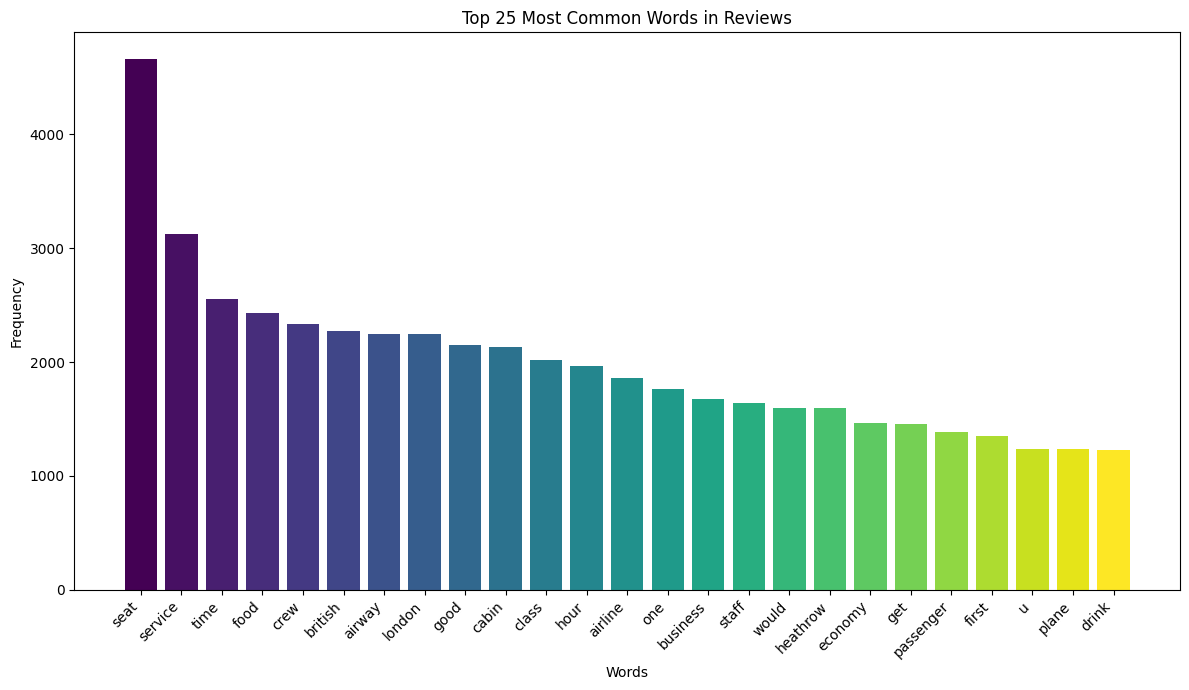

In [33]:
# Exclude specific words ('flight', 'ba')
excluded_words = {'flight', 'ba'}
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in excluded_words}

# Get the top 25 most common words (after filtering)
most_common_words = Counter(filtered_word_counts).most_common(25)

# Prepare data for plotting
words, counts = zip(*most_common_words)

colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

# Creating a bar plot
plt.figure(figsize=(12, 7))
plt.bar(words, counts, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Top 25 Most Common Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

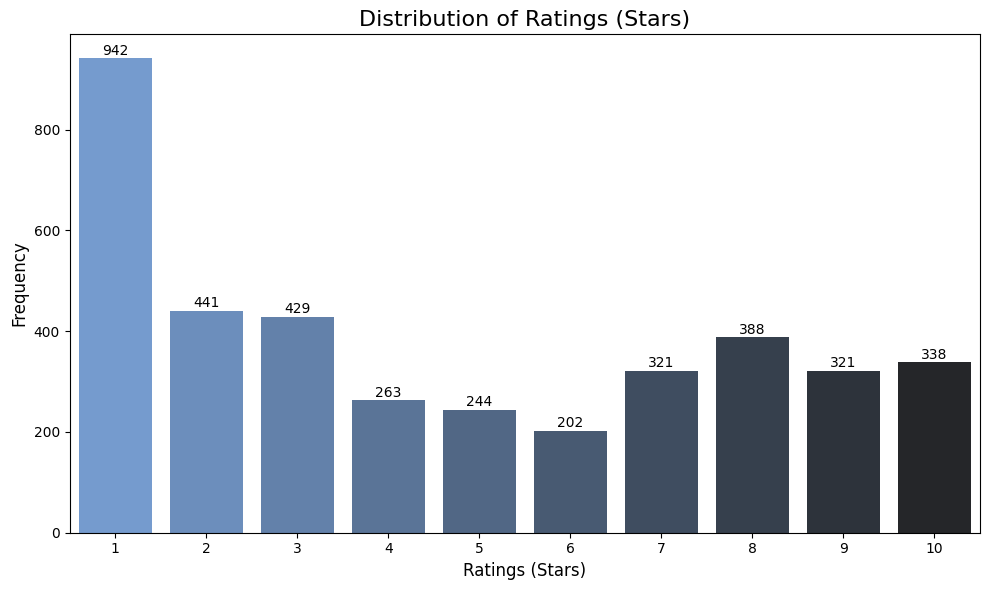

In [34]:
# Generating a discrete dark palette
palette = sns.dark_palette("#69d", n_colors=10, reverse=True)

# Plot the distribution of ratings in ascending order
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, hue='stars', palette=palette, order=sorted(df['stars'].unique()), dodge=False, legend=False)

# Adding labels and title
plt.title("Distribution of Ratings (Stars)", fontsize=16)
plt.xlabel("Ratings (Stars)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add frequency labels on top of the bars
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate of the label
        bar.get_height() + 1,               # Y-coordinate of the label
        int(bar.get_height()),              # Label text (frequency)
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


## Sentiment Scoring

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm  # For progress bar visualization

# Setting up the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [36]:
# Setting up a dictionary to store results
res = {}

# Iterate through each row in the DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['lemma_reviews'] 
    myid = i        # Using 'date' as a unique identifier
    res[myid] = sia.polarity_scores(text)  

100%|██████████| 3889/3889 [00:04<00:00, 902.97it/s] 


In [37]:
res

{0: {'neg': 0.163, 'neu': 0.754, 'pos': 0.083, 'compound': -0.9183},
 1: {'neg': 0.169, 'neu': 0.758, 'pos': 0.073, 'compound': -0.7432},
 2: {'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'compound': -0.6369},
 3: {'neg': 0.241, 'neu': 0.65, 'pos': 0.108, 'compound': -0.8015},
 4: {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.9814},
 5: {'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.9081},
 6: {'neg': 0.144, 'neu': 0.765, 'pos': 0.092, 'compound': -0.9206},
 7: {'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'compound': 0.1027},
 8: {'neg': 0.048, 'neu': 0.793, 'pos': 0.159, 'compound': 0.9563},
 9: {'neg': 0.062, 'neu': 0.938, 'pos': 0.0, 'compound': -0.25},
 10: {'neg': 0.203, 'neu': 0.597, 'pos': 0.2, 'compound': -0.5106},
 11: {'neg': 0.061, 'neu': 0.666, 'pos': 0.273, 'compound': 0.9821},
 12: {'neg': 0.185, 'neu': 0.681, 'pos': 0.135, 'compound': -0.8937},
 13: {'neg': 0.117, 'neu': 0.788, 'pos': 0.095, 'compound': -0.5267},
 14: {'neg': 0.099, 'neu': 0.591, 'pos': 0.309, 'co

In [38]:
# Merge sentiment scores with the original dataset using unique IDs

vaders = pd.DataFrame(res).T
vaders =vaders.rename_axis('unique_id')
vaders = vaders.reset_index().rename(columns={'index': 'unique_id'})
vaders = vaders.merge(df, on='unique_id', how='left')
vaders

,unique_id,neg,neu,pos,compound,reviews,seat_type,date,country,stars,lemma_reviews
0,0,0.163,0.754,0.083,-0.9183,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1,trip verified im fraustrated flight cancelled ...
1,1,0.169,0.758,0.073,-0.7432,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1,sat plane hour forty five minute awaiting take...
2,2,0.089,0.911,0.000,-0.6369,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1,british airway stranding wife heathrow airport...
3,3,0.241,0.650,0.108,-0.8015,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4,although like many day avoid ba long haul lond...
4,4,0.000,0.393,0.607,0.9814,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10,flight british airway best flight attendant ou...
...,...,...,...,...,...,...,...,...,...,...,...
3884,3891,0.044,0.617,0.339,0.9531,Flew LHR - VIE return operated by bmi but BA a...,Economy Class,2012-08-29,United Kingdom,10,flew lhr vie return operated bmi ba aircraft a...
3885,3892,0.000,0.708,0.292,0.7650,LHR to HAM. Purser addresses all club passenge...,Business Class,2012-08-28,United Kingdom,9,lhr ham purser address club passenger name boa...
3886,3893,0.067,0.810,0.122,0.7003,My son who had worked for British Airways urge...,Economy Class,2011-10-12,United Kingdom,5,son worked british airway urged fly british ai...
3887,3894,0.000,0.696,0.304,0.8070,London City-New York JFK via Shannon on A318 b...,Premium Economy,2011-10-11,United States,4,london citynew york jfk via shannon a318 reall...


In [39]:
# displaying First 10 rows in the dataframe

vaders[:10]



,unique_id,neg,neu,pos,compound,reviews,seat_type,date,country,stars,lemma_reviews
0,0,0.163,0.754,0.083,-0.9183,✅ Trip Verified | I'm so fraustrated. My fli...,Economy Class,2024-11-29,United Kingdom,1,trip verified im fraustrated flight cancelled ...
1,1,0.169,0.758,0.073,-0.7432,✅ Trip Verified | We have sat on this plane fo...,Economy Class,2024-11-23,United Kingdom,1,sat plane hour forty five minute awaiting take...
2,2,0.089,0.911,0.000,-0.6369,Not Verified | British Airways stranding my w...,Economy Class,2024-11-18,United States,1,british airway stranding wife heathrow airport...
3,3,0.241,0.650,0.108,-0.8015,✅ Trip Verified | Although like many these d...,Economy Class,2024-11-17,United Kingdom,4,although like many day avoid ba long haul lond...
4,4,0.000,0.393,0.607,0.9814,✅ Trip Verified | This flight was British Airw...,Business Class,2024-11-15,United Kingdom,10,flight british airway best flight attendant ou...
5,5,0.190,0.810,0.000,-0.9081,Not Verified | The worst airline I have ever f...,Economy Class,2024-11-13,Australia,1,worst airline ever flown cancelled flight 3 ho...
6,6,0.144,0.765,0.092,-0.9206,"✅ Trip Verified | Disappointing service, pla...",Economy Class,2024-11-08,Iceland,3,disappointing service plane interior terribly ...
7,7,0.000,0.965,0.035,0.1027,✅ Trip Verified | A transit visa is required...,Economy Class,2024-11-08,Singapore,1,transit visa required partner transit via lond...
8,8,0.048,0.793,0.159,0.9563,✅ Trip Verified | I was surprised to receive...,Economy Class,2024-11-07,Turkey,3,trip verified surprised receive confirmation p...
9,9,0.062,0.938,0.000,-0.2500,"✅ Trip Verified | Flight cancelled, not refu...",Economy Class,2024-11-07,Canada,1,flight cancelled refunding money saying took f...


In [40]:
# Calculating the Customer Sentiment Score

total_sentiment = vaders['compound'].sum()  # Sum of all compound sentiment scores
total_reviews = vaders['compound'].count()  # Total number of reviews
customer_sentiment_score = total_sentiment / total_reviews

print(f"Customer Sentiment Score: {customer_sentiment_score:.2f}")


Customer Sentiment Score: 0.29


## Sentiment Graph


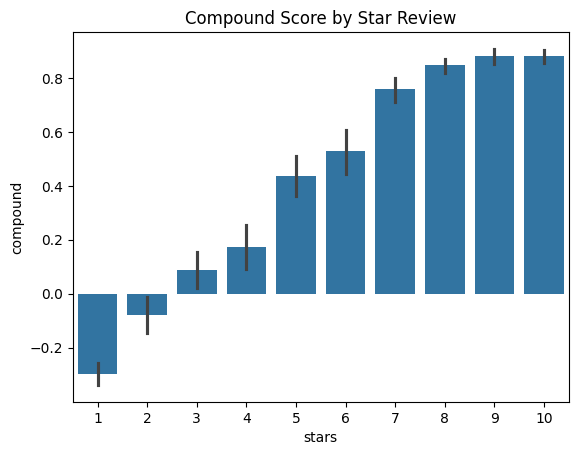

In [41]:
sg = sns.barplot(data=vaders, x='stars', y='compound')
sg.set_title('Compound Score by Star Review')
plt.show()

In [42]:
# Filter positive and negative reviews

positive_reviews = " ".join(vaders[vaders['compound'] > 0.5]['lemma_reviews'])
negative_reviews = " ".join(vaders[vaders['compound'] < -0.5]['lemma_reviews'])

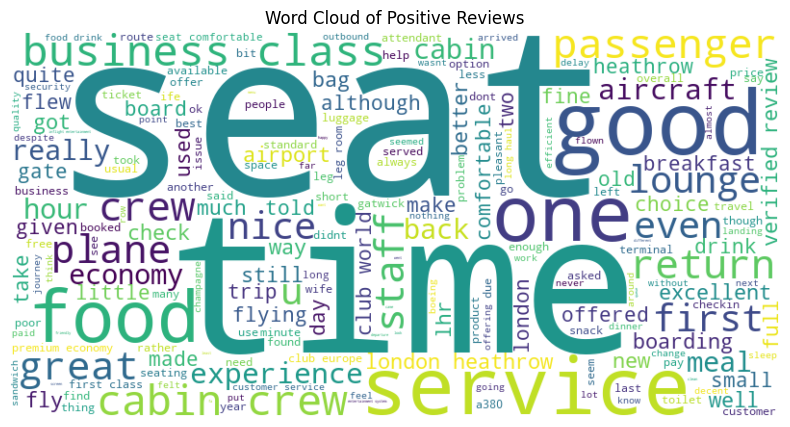

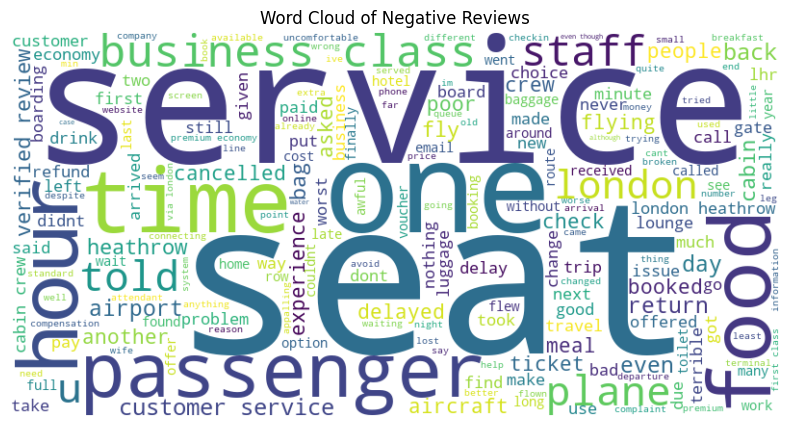

In [43]:
# Generate word clouds
from wordcloud import WordCloud, STOPWORDS

# Defining additional stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["flight", "ba", "british", "airway", "airline"])  
# Added additional stopwords to exclude common and irrelevant words from the word cloud

# Positive word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords =custom_stopwords).generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

# Negative word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords =custom_stopwords).generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()


In [44]:
# Importing required modules
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap

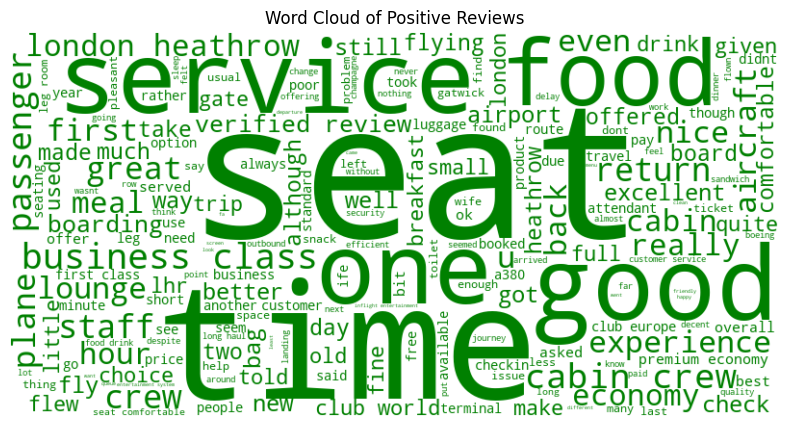

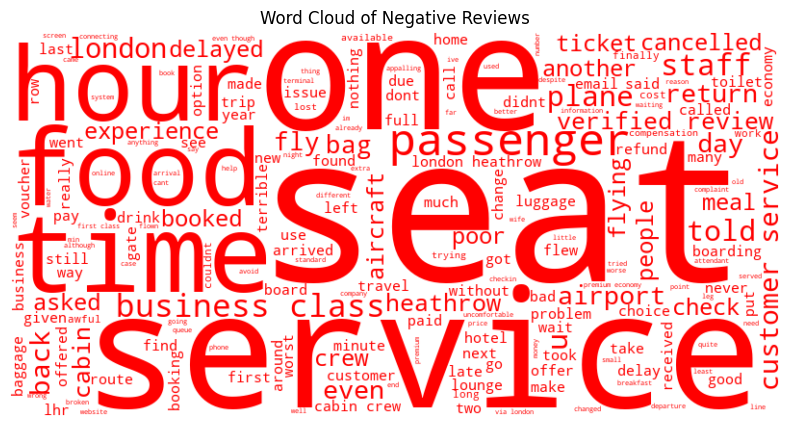

In [45]:

# Define additional stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["flight", "ba", "british", "airway", "airline"])  

# Define color functions
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(0, 128, 0)"  # Green color in RGB

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, 0, 0)"  # Red color in RGB

# Positive word cloud
positive_wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=custom_stopwords
).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud.recolor(color_func=green_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

# Negative word cloud
negative_wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=custom_stopwords
).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud.recolor(color_func=red_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()


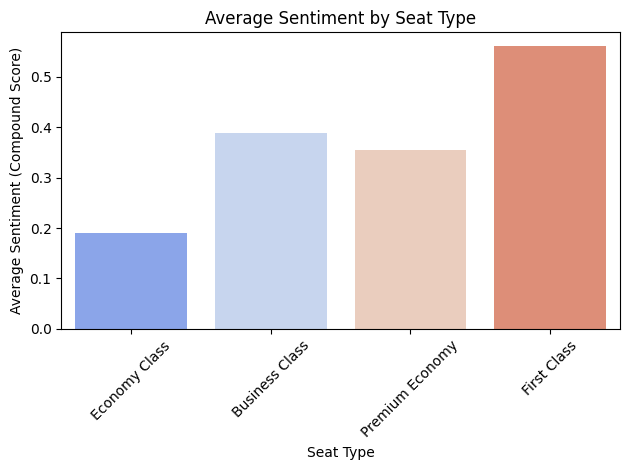

In [46]:
#Creating a barplot of average sentiment scores by seat type.

sns.barplot(data=vaders, x='seat_type', y='compound',  hue='seat_type', errorbar=None, palette='coolwarm')
plt.title("Average Sentiment by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Average Sentiment (Compound Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


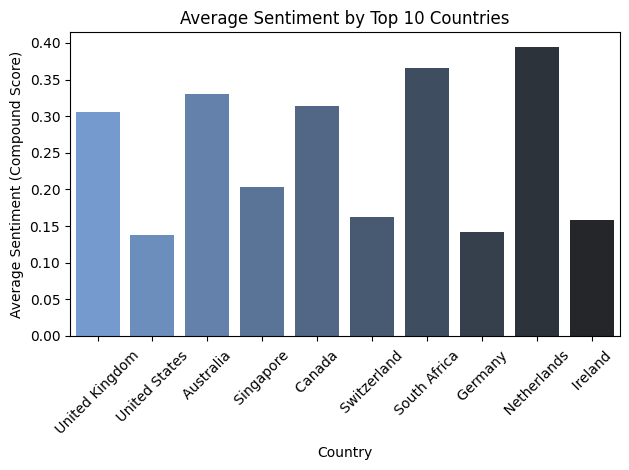

In [47]:
# Creating a barplot of average sentiment scores by Top 10 Countries.

# Generating a discrete dark palette
palette = sns.dark_palette("#69d", n_colors=10, reverse=True)

# Get the top 10 countries by the number of reviews
top_10 = df['country'].value_counts().head(10).index

# Filter the dataset to include only the top 10 countries
filtered_data = vaders[vaders['country'].isin(top_10)]

# Plot the sentiment for the top 10 countries
sns.barplot(data=filtered_data, x='country', y='compound', hue='country', errorbar=None, palette=palette)
plt.title("Average Sentiment by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Average Sentiment (Compound Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Text Analysis

In [48]:
# Categorizing reviews based on star ratings (low: 1-3, mid: 4-6, high: 7-10)

sr_1_3 = df[df.stars.isin([1,2,3])]
sr_4_6 = df[df.stars.isin([4,5,6])]
sr_7_10 = df[df.stars.isin([7,8,9,10])]

In [49]:
# Joining the reviews for each group into a single string

review_1_3 = " ".join(sr_1_3['lemma_reviews'])  
review_4_6 = " ".join(sr_4_6['lemma_reviews'])
review_7_10 = " ".join(sr_7_10['lemma_reviews'])

In [50]:
# Spliting the reviews into individual words

word_1_3 = review_1_3.split(" ")
word_4_6 = review_4_6.split(" ")
word_7_10 = review_7_10.split(" ")

In [51]:
# Defining stopwords 
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# Removing stopwords from the word list for 1-3 star reviews
n_review_1_3 = [word for word in word_1_3 if word not in stopwords]

# Define a function to calculate and display frequency distribution
from collections import Counter
def get_freq_dist(words):
    freq_dist = Counter(words)
    return freq_dist.most_common(10)  

# Get frequency distribution for 1-3 star reviews
freq_dist_1_3 = get_freq_dist(n_review_1_3)
print(freq_dist_1_3)


[('flight', 4257), ('ba', 2776), ('seat', 2159), ('service', 1537), ('british', 1350), ('airway', 1330), ('hour', 1293), ('airline', 1213), ('london', 1163), ('time', 1131)]


In [52]:
# Removing stopwords from the word list for 4-6 star reviews
n_review_4_6 = [word for word in word_4_6 if word not in stopwords]

# Define a function to calculate and display frequency distribution
from collections import Counter
def get_freq_dist(words):
    freq_dist = Counter(words)
    return freq_dist.most_common(10)  

# Get frequency distribution for 4-6 star reviews
freq_dist_4_6 = get_freq_dist(n_review_4_6)
print(freq_dist_4_6)

[('flight', 1332), ('seat', 1049), ('ba', 1006), ('service', 560), ('food', 521), ('crew', 497), ('cabin', 465), ('class', 453), ('time', 449), ('london', 400)]


In [53]:
# Removing stopwords from the word list for 7-10 star reviews
n_review_7_10 = [word for word in word_7_10 if word not in stopwords]

# Define a function to calculate and display frequency distribution
from collections import Counter
def get_freq_dist(words):
    freq_dist = Counter(words)
    return freq_dist.most_common(10)  

# Get frequency distribution for 7-10 star reviews
freq_dist_7_10 = get_freq_dist(n_review_7_10)
print(freq_dist_7_10)

[('flight', 2714), ('seat', 1456), ('good', 1384), ('ba', 1345), ('crew', 1083), ('service', 1030), ('food', 975), ('time', 972), ('cabin', 843), ('london', 681)]


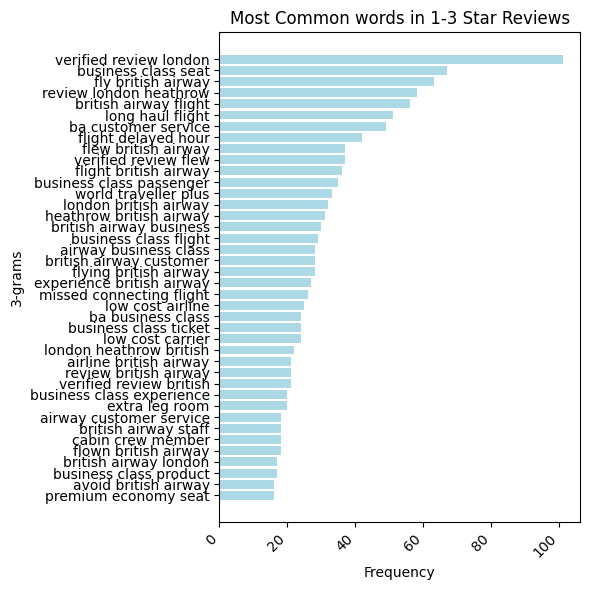

In [57]:
# Using N-grams to identify the most common word combinations 

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Function to extract and plot N-grams
def plot_ngrams(reviews, n=3, top_n=40):
    # Generating N-grams using CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(reviews)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()

    # Creating a frequency dictionary
    ngram_freq = Counter(dict(zip(ngram_vocab, ngram_counts)))
    most_common_ngrams = ngram_freq.most_common(top_n)

    # Extracting N-grams and it's counts
    ngram_words, ngram_counts = zip(*most_common_ngrams)

    # Plot the N-grams
    plt.figure(figsize=(6, 6))
    plt.barh(ngram_words, ngram_counts, color='lightblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Most Common words in 1-3 Star Reviews")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Applying the function to the reviews for 1-3 star reviews
plot_ngrams(sr_1_3['lemma_reviews'], n=3, top_n=40) 

plt.show()


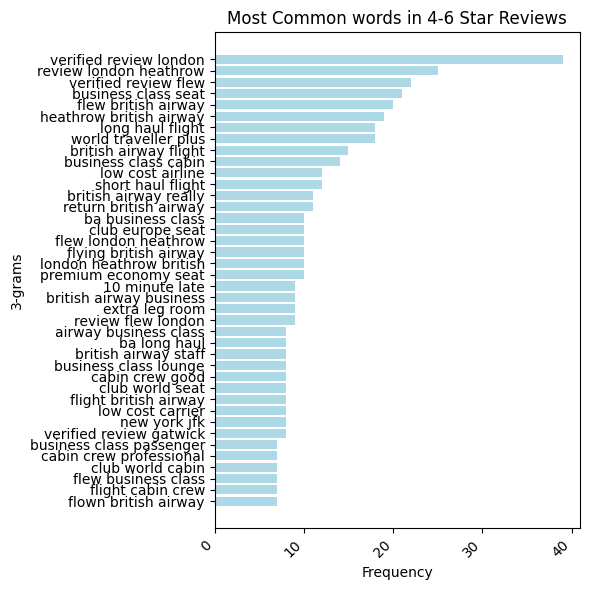

In [58]:
# Function to extract and plot N-grams for 4_6 star reviews
def plot_ngrams(reviews, n=3, top_n=40):
    # Generating N-grams using CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(reviews)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()

    # Creating a frequency dictionary
    ngram_freq = Counter(dict(zip(ngram_vocab, ngram_counts)))
    most_common_ngrams = ngram_freq.most_common(top_n)

    # Extracting N-grams and it's counts
    ngram_words, ngram_counts = zip(*most_common_ngrams)

    # Plot the N-grams
    plt.figure(figsize=(6, 6))
    plt.barh(ngram_words, ngram_counts, color='lightblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Most Common words in 4-6 Star Reviews")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Applying the function to the reviews for 4-6 star reviews
plot_ngrams(sr_4_6['lemma_reviews'], n=3, top_n=40)  

plt.show()


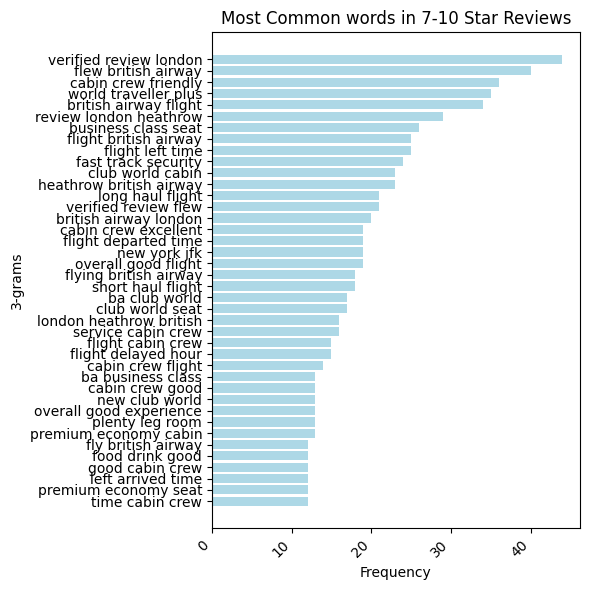

In [56]:
# Function to extract and plot N-grams for 7-10 star reviews
def plot_ngrams(reviews, n=3, top_n=40):
    # Generating N-grams using CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(reviews)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()

    # Creating a frequency dictionary
    ngram_freq = Counter(dict(zip(ngram_vocab, ngram_counts)))
    most_common_ngrams = ngram_freq.most_common(top_n)

    # Extracting N-grams and it's counts
    ngram_words, ngram_counts = zip(*most_common_ngrams)

    # Plot the N-grams
    plt.figure(figsize=(6, 6))
    plt.barh(ngram_words, ngram_counts, color='lightblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Most Common words in 7-10 Star Reviews")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

# Applying the function to the reviews for 7-10 star reviews
plot_ngrams(sr_7_10['lemma_reviews'], n=3, top_n=40) 

plt.show()
